# Acceleration Error

Test differences in step time in two segments that ought to start and end at the same time. 


In [366]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from math import log, sqrt
from itertools import count
import pandas as pd
import numpy as np
period = 4
import random
from trajectory.segments import SimSegment
from trajectory.segments import Joint, SegmentList

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [221]:
ss1 = SimSegment(50, 20_000, 5000)
ss2 = SimSegment(50, 2_000, 500)
print(ss1.initial_params())
print(ss2.initial_params())
print ( (len(list(ss1.iter_discrete(period)))*period) - (len(list(ss2.iter_discrete(period)))*period) )


(0, 4780.0567785218345, 9789556)
(0, 15120.545436886301, 30966877)
7036


In [229]:
ss2 = SimSegment(50, 2_000, 500)
list(ss2.iter_discrete(period))
ss2.sim_time

0.49263600000041

In [292]:
def calc_segment(x, v0,  v1):
    t = abs(2. * float(x) / float(v1+v0) )
    a = (v1 - v0) / t
    return t

def simulate_segment(x, v0,  v1):
    period = 4
    ss = SimSegment(v0,v1,x)
    list(ss.iter_discrete(period))
    return ss.sim_time


def rand_segment():
    a_max = 1_000_000
    
    while True:
        x = random.randint(0,100000)
        v0 = random.randint(0,100000)
        v1 = random.randint(0,100000)

        t = abs(2. * float(x) / float(v1+v0) )
        a = (v1 - v0) / t
        
        if a <= a_max:
            return x, t, v0,  v1

x, t, v0,  v1 = rand_segment()
x, t, v0,  v1


(50118, 1.192916478232928, 75460, 8566)

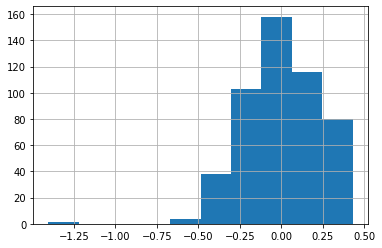

In [294]:
rs = [rand_segment() for _ in range(500)]

df = pd.DataFrame(rs, columns = 'x t v0 v1'.split())

df['sim_time'] = df.apply(lambda r : simulate_segment(r['x'], r.v0,  r.v1) , axis=1) 

df['err'] = (df.t - df.sim_time)/(df.t)
df['err'].hist()

In [276]:
df.sort_values('err')

,x,t,v0,v1,sim_time,err
87,21549,1.074629,165,39940,130.600000,-120.530303
8,10657,0.282675,1351,74050,7.888232,-26.905629
83,5984,0.141803,2071,82328,2.889428,-19.376407
35,94920,2.622317,3750,68644,25.311988,-8.652529
56,94297,2.546297,7457,66609,12.645424,-3.966202
...,...,...,...,...,...,...
51,83220,1.630119,91340,10763,0.911076,0.441098
31,85492,2.125371,72900,7549,1.172720,0.448228
93,44944,0.923074,90798,6581,0.494980,0.463770
18,27176,0.817717,63481,2987,0.428092,0.476479


In [279]:
simulate_segment(20000, 200,  40000), calc_segment(20000, 200,  40000)

(100.00000401611489, 0.9950248756218906)

In [290]:
simulate_segment(20000, 100,  10000), calc_segment(20000, 100,  10000)

2 10000.0 20480000


(4.470847999992937, 3.9603960396039604)

In [362]:
from itertools import islice
ss = SimSegment(v0=0, v1=10000, x=100)
for e in islice(ss.iter_time(period),20):
    print(e)

(0, 0, 99, 0, 0, 0)
(1, 4.0, 98, 0.0, 4e-06, 0)
(355, 1420.0, 97, 708.0000000000042, 0.0014200000000000085, 0.001412429378531065)
(356, 1424.0, 96, 710.0000000000042, 0.0014240000000000086, 0.0014084507042253437)
(357, 1428.0, 95, 712.0000000000043, 0.0014280000000000087, 0.0014044943820224634)
(358, 1432.0, 94, 714.0000000000043, 0.0014320000000000088, 0.0014005602240896274)
(359, 1436.0, 93, 716.0000000000044, 0.0014360000000000089, 0.0013966480446927288)
(360, 1440.0, 92, 718.0000000000044, 0.001440000000000009, 0.0013927576601671222)
(361, 1444.0, 91, 720.0000000000044, 0.001444000000000009, 0.0013888888888888803)
(362, 1448.0, 90, 722.0000000000045, 0.0014480000000000092, 0.0013850415512465287)
(363, 1452.0, 89, 724.0000000000045, 0.0014520000000000093, 0.001381215469613251)
(364, 1456.0, 88, 726.0000000000047, 0.0014560000000000094, 0.0013774104683195504)
(365, 1460.0, 87, 728.0000000000047, 0.0014600000000000095, 0.0013736263736263648)
(366, 1464.0, 86, 730.0000000000048, 0.0014

In [363]:
l = list(ss.iter_time(period))
l[-1], len(l)

((452,
  1808.0,
  0,
  902.0000000000089,
  0.001808000000000018,
  0.001108647450110854),
 100)

In [361]:
calc_segment(100, 0, 10000)

0.02

In [358]:
a = 5
b = 7

( (1/a) - (1/b)), (b-a)/(a*b)

(0.05714285714285716, 0.05714285714285714)

In [381]:
sl = SegmentList([Joint(75000, 300_000, 300_000), Joint(75000, 300_000, 300_000)])
for i in range(2):
    sl.add_distance_segment([100_000, 10_000])

sl.update()
    
ss = []
for e in sl.sub_segments:
    print(e)
    ss.append([SimSegment(x=axis.x, v0=axis.v_i, v1=axis.v_f)  for i, axis in enumerate(e)]) 

([a 0.25000  8635     0->69079  (0    ,    20041)] , [a 0.25000   864     0-> 6908  (0    ,   200408)] )
([c 1.08333 74835 69079->69079  (0    ,    29647)] , [c 1.08333  7483  6908-> 6908  (0    ,   296461)] )
([d 0.25000 16530 69079->63158  (-2   ,    29647)] , [d 0.25000  1653  6908-> 6316  (-2   ,   296461)] )
([a 0.25000 16530 63158->69079  (1    ,    32426)] , [a 0.25000  1653  6316-> 6908  (1    ,   324266)] )
([c 1.08333 74835 69079->69079  (0    ,    29647)] , [c 1.08333  7483  6908-> 6908  (0    ,   296461)] )
([d 0.25000  8635 69079->    0  (0    ,    29647)] , [d 0.25000   864  6908->    0  (0    ,   296461)] )


In [380]:
def run_ss(ss):
    l = list(ss.iter_time(period))
    return len(l), ss.sim_time, ss.a, ss.x, ss.v0, ss.v1

for i, e in enumerate(ss):
    print([run_ss(i) for i in e])

[(4006, 0.16655600000008394, 288496.0835591113, 4006, 0, 48077.34), (401, 0.16596000000008335, 28823.660250498757, 401, 0, 4807.97)]
[(88141, 1.833299999978622, 0.0, 88141, 48077.34, 48077.34), (8814, 1.83299999997863, 0.0, 8814, 4807.97, 4807.97)]
[(7853, 0.16665600000008404, -11538.70529852922, 7853, 48077.34, 46154.13), (785, 0.16639600000008378, -1155.7745559235696, 785, 4807.97, 4615.41)]
[(7853, 0.16665600000008404, 11538.70529852922, 7853, 46154.13, 48077.34), (785, 0.16639600000008378, 1155.7745559235696, 785, 4615.41, 4807.97)]
[(88141, 1.833299999978622, 0.0, 88141, 48077.34, 48077.34), (8814, 1.83299999997863, 0.0, 8814, 4807.97, 4807.97)]
[(4006, 0.16666000000008405, -288496.0835591113, 4006, 48077.34, 0), (401, 0.1668160000000842, -28823.660250498757, 401, 4807.97, 0)]
